In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
fig = plt.figure(figsize=(20,15))
pd.set_option("display.max_columns",100)
pd.get_option("display.max_columns")

100

In [41]:
df = pd.read_excel('BLS_SA_Unemployment.xlsx',header=3)

In [42]:
ts_df = df.transpose()
ts_df = ts_df.iloc[1:]
ts_df.columns = ["seasonally_adjusted_unemployment_rate"]
date_rng = pd.date_range(start='1/1/1948', end='12/31/2018', freq='MS')
ts_df.index = date_rng
# ts_df = ts_df[ts_df.index.is_quarter_end == True]
ts_df.head()

,seasonally_adjusted_unemployment_rate
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4
1948-04-01,3.9
1948-05-01,3.5


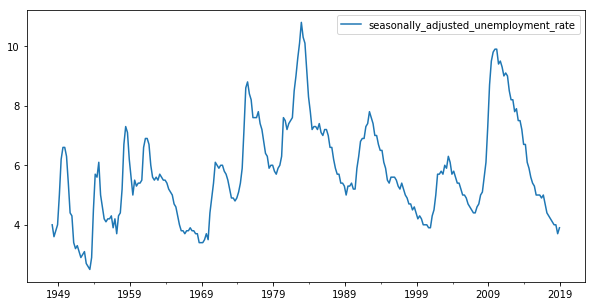

In [4]:
ts_df.plot(figsize=[10,5])

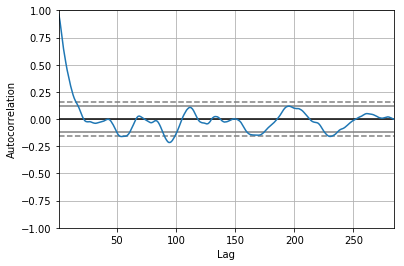

In [5]:
pd.plotting.autocorrelation_plot(ts_df)
# Autocorrelation = Matching our feature and time; How closely is the information given by time equal to the target feature
# Shows there is a high level of positive correlation between recent periods, but decays over time the correlation tends to center around the 0 mean
# Might need to consider adding additional normalization

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


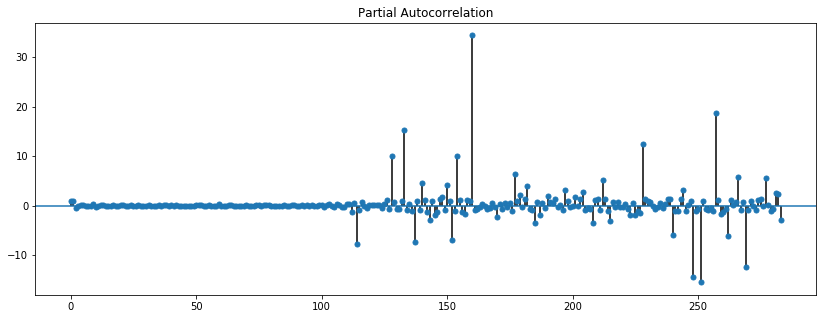

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(ts_df);

In [7]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [35]:
dataset = sm.datasets.co2.load().data
df = pd.DataFrame(dataset)
df['date'] = pd.to_datetime(df.date.str.decode("utf-8"))
df.set_index(df['date'], inplace=True)
df.drop(['date'], axis=1, inplace=True)
df = df.asfreq('W-SAT')

# The 'MS' string groups the data in buckets by start of the month
CO2 = df['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
CO2 = CO2.fillna(CO2.bfill())

# Plot the time-series
CO2.plot(figsize=(15, 6))
plt.show()
CO2.head()

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.40

In [50]:
CO2

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.40

In [62]:
ts_df_input = pd.to_numeric(ts_df.seasonally_adjusted_unemployment_rate)

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [64]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_df_input,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =5464.770184245424
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4439.909301148371
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =2683.3404004578333
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =2602.2964627253364
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =2679.9423681686003


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =2678.609015233141
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =2608.0204433540903
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =2590.9909771260172
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4305.604430265357
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3350.874315922722
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1785.9761813753578
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1708.825228198561
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1781.3633367017596
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1775.270566469567
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =1726.9536176037504
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =1709.725706656513
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =-250.66463354169196
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-278.14820551184835
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =457.8430612526822
ARIMA (0, 1

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =-338.54165246574473
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =129.03039731844123
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-200.0275549824296
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =-255.72328650169942
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-284.89384047096667
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =455.0923485109562
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =-268.38602081099236
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-270.3485338474235
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-349.752868669832
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =116.85886955024574
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-206.7199659699501
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-246.49758343538292


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-239.64592317907756
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =444.2162107595335
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =-253.101040121241
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =-262.6507012374916
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-271.36605386963765
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =120.87146798850668
ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =-198.2182265746288
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =-254.3824106190134


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =-245.6933502289083
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =439.60495865413685
ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =-269.68453361142485
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =-268.58750147227556
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =-281.7034430291972
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =106.99290218905054
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =-206.67380403538675
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =-260.47613524451225
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =-289.754100996121
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =451.8334174129506


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =-275.24398506009805
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =-278.30078109545514
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =-356.0000439884905
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =106.13107378139566
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =-210.1737924136549
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =-323.03662741264634
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =-372.0066661689764
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =400.25877887516396


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =-344.20362238116655
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =-357.5058092987767
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =-432.3074018824609
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =35.68350514814185
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =-289.977660797269


In [65]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 0, 1, 12)
aic          -432.307
Name: 61, dtype: object

In [69]:
ans_df.loc[ans_df['aic'].idxmin()][0]

(1, 0, 1, 12)

In [70]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_df_input,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9083      0.022     41.988      0.000       0.866       0.951
ma.L1         -0.7574      0.034    -22.216      0.000      -0.824      -0.691
ar.S.L12       0.4920      0.046     10.678      0.000       0.402       0.582
ma.S.L12      -0.8164      0.031    -26.196      0.000      -0.877      -0.755
sigma2         0.0340      0.001     33.177      0.000       0.032       0.036


In [80]:
def arima_modeler(data,pdq_lower,pdq_upper,m):
    p = d = q = range(pdq_lower, pdq_upper)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_df_input,
                                order=ans_df.loc[ans_df['aic'].idxmin()][0],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    print(output.summary().tables[1])
    return output

In [81]:
arima_unemployment = arima_modeler(ts_df_input,0,2,12)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9083      0.022     41.988      0.000       0.866       0.951
ma.L1         -0.7574      0.034    -22.216      0.000      -0.824      -0.691
ar.S.L12       0.4920      0.046     10.678      0.000       0.402       0.582
ma.S.L12      -0.8164      0.031    -26.196      0.000      -0.877      -0.755
sigma2         0.0340      0.001     33.177      0.000       0.032       0.036


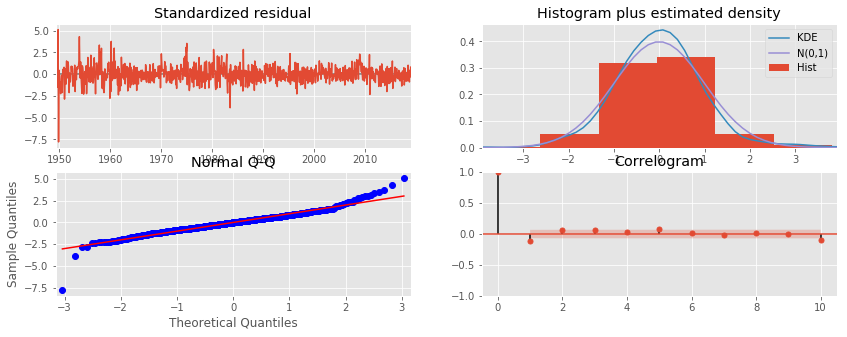

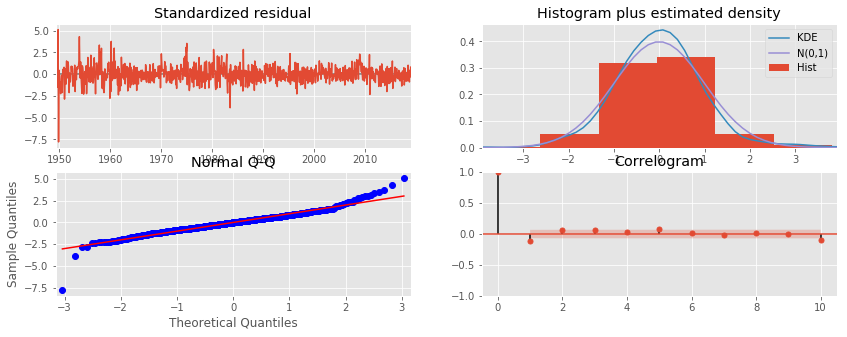

In [79]:
arima_unemployment.plot_diagnostics()

In [82]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

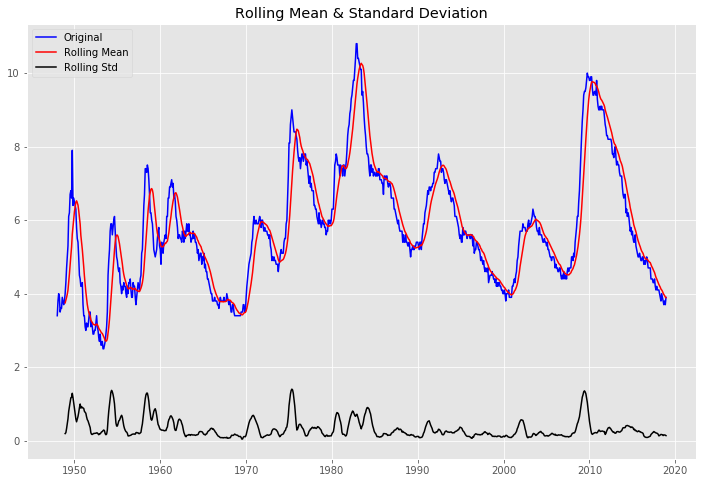

Results of Dickey-Fuller Test:
Test Statistic                  -3.047236
p-value                          0.030712
#Lags Used                      12.000000
Number of Observations Used    839.000000
Critical Value (1%)             -3.438168
Critical Value (5%)             -2.864991
Critical Value (10%)            -2.568608
dtype: float64


In [84]:
test_stationarity(ts_df_input)